In [4]:
import torch

print(torch.__version__)
print(torch.version.cuda)

from torch_geometric.data import DataLoader, Data, Dataset

import pickle
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

sys.path.append("..")
from gnn_tools.graphs import customDataset

%matplotlib inline

1.12.1
None


In [5]:
dataset_train = customDataset()
dataset_test = customDataset()

path_to_save = "./"
dir_name = "2L_nominal"

dataset_train.download_from("{}/{}_{}".format(path_to_save, dir_name, "Even"))
dataset_test.download_from("{}/{}_{}".format(path_to_save, dir_name, "Odd"))

Done
Done


In [ ]:
loader_train = DataLoader(dataset_train, batch_size=10000, shuffle=True, num_workers=3)
loader_test = DataLoader(dataset_test, batch_size=10000, shuffle=True, num_workers=3)

In [ ]:
cuda = torch.device("cuda")  # requires cuda gpu
cpu = torch.device("cpu")

In [ ]:
from gnn_tools.train import runTraining
from gnn_tools.model import MPGNN_1L, MPGNN_2L

In [ ]:
def trainModel(model, loader_train, loader_test, outfile):
    model = model.to(cuda)
    optimizer = torch.optim.Adam(
        model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, amsgrad=False
    )
    criterion = torch.nn.BCELoss(reduction="none")

    model, history = runTraining(model, loader_train, loader_test, 50, 200, outfile, cuda, criterion, optimizer)

Epoch: 1, 	Training loss: 1.7624,	Test loss: 1.6877, 			Training time: 22.43s, 	Evaluation time: 23.16s, 	Total time elapsed: 45.59s
Test loss improved from inf to 1.6877. Saving model to "2L_nominal_Even.pt"


Epoch: 2, 	Training loss: 1.5151,	Test loss: 1.4283, 			Training time: 22.36s, 	Evaluation time: 24.04s, 	Total time elapsed: 92.03s
Test loss improved from 1.6877 to 1.4283. Saving model to "2L_nominal_Even.pt"


Epoch: 3, 	Training loss: 1.3495,	Test loss: 1.4734, 			Training time: 22.42s, 	Evaluation time: 22.53s, 	Total time elapsed: 136.99s
Test loss did not improve.


Epoch: 4, 	Training loss: 1.3021,	Test loss: 1.4131, 			Training time: 24.71s, 	Evaluation time: 22.67s, 	Total time elapsed: 184.37s
Test loss improved from 1.4283 to 1.4131. Saving model to "2L_nominal_Even.pt"


Epoch: 5, 	Training loss: 1.2783,	Test loss: 1.4184, 			Training time: 23.09s, 	Evaluation time: 23.12s, 	Total time elapsed: 230.59s
Test loss did not improve.


Epoch: 6, 	Training loss: 1.2563,	

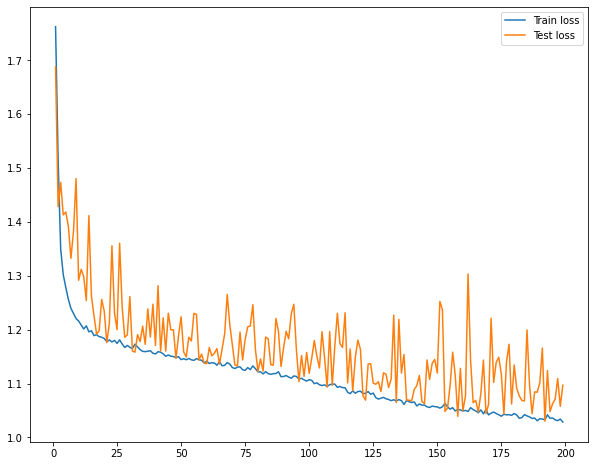

In [ ]:
model = MPGNN_2L()
trainModel(model, loader_train, loader_test, "2L_nominal_Even.pt")

Epoch: 1, 	Training loss: 1.7772,	Test loss: 1.6492, 			Training time: 23.00s, 	Evaluation time: 21.44s, 	Total time elapsed: 44.44s
Test loss improved from inf to 1.6492. Saving model to "2L_nominal_Odd.pt"


Epoch: 2, 	Training loss: 1.4782,	Test loss: 1.3515, 			Training time: 22.62s, 	Evaluation time: 21.43s, 	Total time elapsed: 88.50s
Test loss improved from 1.6492 to 1.3515. Saving model to "2L_nominal_Odd.pt"


Epoch: 3, 	Training loss: 1.3526,	Test loss: 1.2947, 			Training time: 22.72s, 	Evaluation time: 21.45s, 	Total time elapsed: 132.69s
Test loss improved from 1.3515 to 1.2947. Saving model to "2L_nominal_Odd.pt"


Epoch: 4, 	Training loss: 1.3246,	Test loss: 1.2872, 			Training time: 23.55s, 	Evaluation time: 21.21s, 	Total time elapsed: 177.46s
Test loss improved from 1.2947 to 1.2872. Saving model to "2L_nominal_Odd.pt"


Epoch: 5, 	Training loss: 1.3044,	Test loss: 1.2526, 			Training time: 22.80s, 	Evaluation time: 21.52s, 	Total time elapsed: 221.80s
Test loss impro

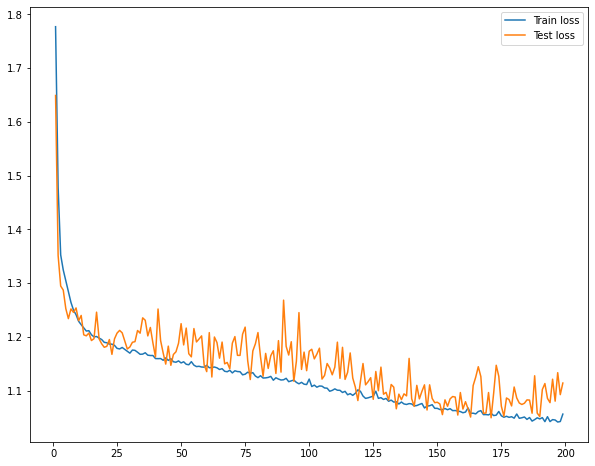

In [ ]:
model = MPGNN_2L()
trainModel(model, loader_train, loader_test, "2L_nominal_Odd.pt")